# 데이터 전처리

In [20]:
from torchvision import datasets, transforms
from torch.utils import data 

# Data loader
train_loader = data.DataLoader(
    datasets.FashionMNIST( root='dataset/',
                    train=True,
                    download=True,
                    transform=transforms.Compose([
                        transforms.RandomHorizontalFlip(),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5,),std=(0.5,))
                    ])
    ),
    batch_size=32,
    shuffle=False
)

# Data loader
test_loader = data.DataLoader(
    datasets.FashionMNIST( root='dataset/',
                    train=False,
                    download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5,),std=(0.5,))
                    ])
    ),
    batch_size=32,
    shuffle=False
)

len(train_loader), len(test_loader)

(1875, 313)

In [21]:
images, labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [22]:
images[0].shape

torch.Size([1, 28, 28])

In [23]:
import numpy as np
import torch
torch_image = torch.squeeze(images[0])
print(torch_image.shape)

torch.Size([28, 28])


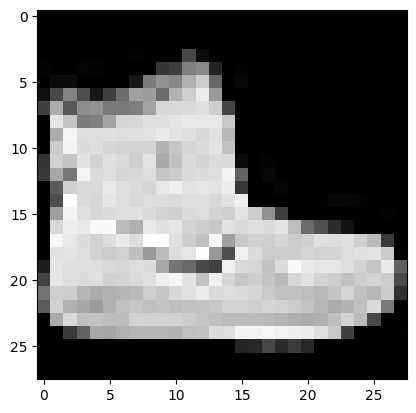

In [43]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import matplotlib.pyplot as plt

plt.imshow(torch_image.numpy(),'gray')
plt.show()

In [26]:
labels[0]

tensor(9)

# CNN

## Model 정의

In [27]:
import torch
import torch.nn as nn

In [28]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [29]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [30]:
weight = weight.detach().numpy()
weight.shape

(20, 1, 5, 5)

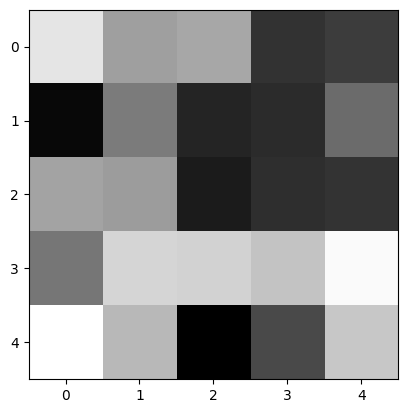

In [31]:
plt.imshow(weight[0,0,:,:],'gray')
plt.show()

In [32]:
output_data = layer(images)
output_data = output_data.data
output = output_data.cpu().numpy()
output.shape

(32, 20, 24, 24)

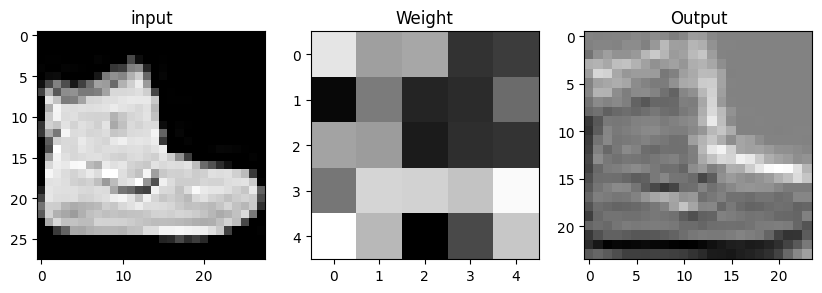

In [34]:
plt.figure(figsize=(10,20))
plt.subplot(131)
plt.title('input')
plt.imshow(images[0,0,:,:], 'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'gray')
plt.subplot(133)
plt.title('Output')
plt.imshow(output[0,0,:,:], 'gray')

In [35]:
import torch.nn.functional as f

In [36]:
images.shape

torch.Size([32, 1, 28, 28])

In [38]:
pool = f.max_pool2d(images, 2, 2)
pool.shape

torch.Size([32, 1, 14, 14])

In [40]:
pool_arr = pool.numpy()
pool_arr.shape

(32, 1, 14, 14)

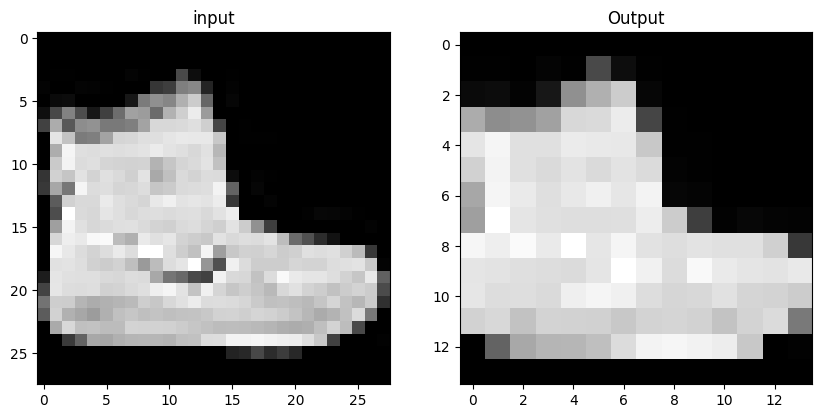

In [42]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title('input')
plt.imshow(images[0,0,:,:], 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:], 'gray')